In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
mnist = pd.read_csv('datasets/digit-recognizer/train.csv')

In [4]:
type(mnist)

pandas.core.frame.DataFrame

In [11]:
mnist.head(12)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mnist.columns

Index([u'label', u'pixel0', u'pixel1', u'pixel2', u'pixel3', u'pixel4',
       u'pixel5', u'pixel6', u'pixel7', u'pixel8',
       ...
       u'pixel774', u'pixel775', u'pixel776', u'pixel777', u'pixel778',
       u'pixel779', u'pixel780', u'pixel781', u'pixel782', u'pixel783'],
      dtype='object', length=785)

In [28]:
mnist.values

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
X = mnist.drop('label', axis=1) # dropping 'label' columns, keeping rest of fields
y = mnist[['label']] # slicing up & keeping just the 'label' column

print(X.shape)
print(y.shape)

(42000, 784)
(42000, 1)


In [30]:
#print y 
#print'--------------------------'
print y.values
y.values

[[1]
 [0]
 [1]
 ...
 [7]
 [6]
 [9]]


array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]], dtype=int64)

In [31]:
def plot_digit(data):
    image = data.values.reshape(28, 28)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.axis('off')
    plt.show()

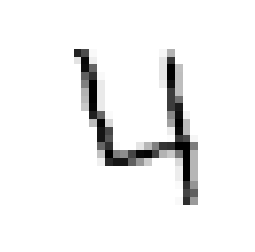

In [34]:
plot_digit(X.iloc[3])

In [35]:
y.iloc[3]

label    4
Name: 3, dtype: int64

In [36]:
# writing your own logic for splitting train & test
def split_train_test(data, test_ratio):
    np.random.seed(29) # to generate random numbers but have the same random numbers generated everytime you run this code
    shuffled_idx = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_idx = shuffled_idx[:test_set_size]
    train_idx = shuffled_idx[test_set_size:]
    
    return data.iloc[train_idx], data.iloc[test_idx]

In [37]:
train_set, test_set = split_train_test(X, 0.2)

print(len(train_set), "train + ", len(test_set), "test")

(33600, 'train + ', 8400, 'test')


In [38]:
train_set.shape

(33600, 784)

In [40]:
test_set.shape

(8400, 784)

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_idx, test_idx in split.split(mnist, mnist['label']):
    strat_train_set = mnist.loc[train_idx]
    strat_test_set = mnist.loc[test_idx]

In [42]:
strat_train_set.shape

(33600, 785)

In [43]:
strat_test_set.shape

(8400, 785)

In [44]:
mnist.shape

(42000, 785)

In [45]:
mnist['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64